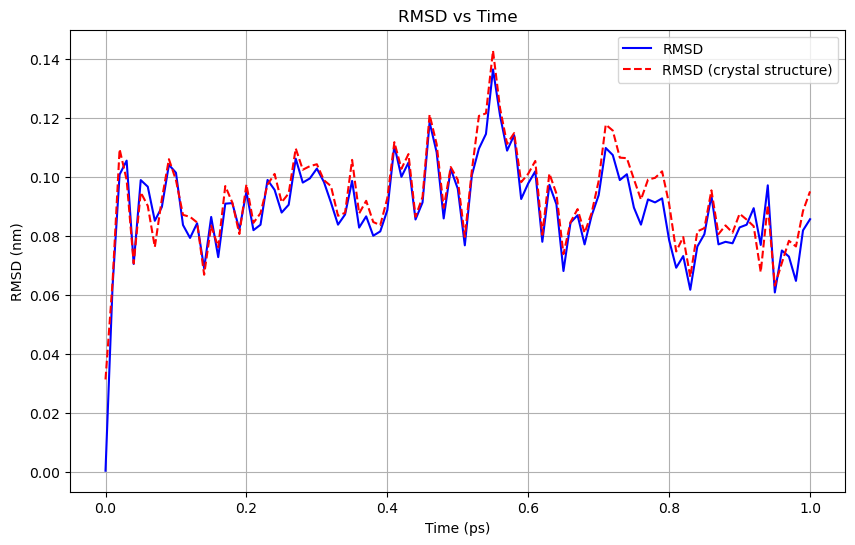

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_rmsd_vs_time(rmsd_file, rmsd_xtal_file, save_path=None):
    # Function to read and extract numerical data from .xvg file
    def read_xvg(file_path):
        with open(file_path, 'r') as file:
            lines = file.readlines()
        
        # Extract numerical data, skipping lines starting with "#" or "@"
        data = []
        for line in lines:
            if not line.startswith(('#', '@')):
                data.append([float(value) for value in line.split()])
        return np.array(data)
    
    # Load RMSD data
    rmsd_data = read_xvg(rmsd_file)
    rmsd_xtal_data = read_xvg(rmsd_xtal_file)
    
    # Extract time and RMSD values
    time_ps_rmsd = rmsd_data[:, 0]
    rmsd_values = rmsd_data[:, 1]
    
    time_ps_rmsd_xtal = rmsd_xtal_data[:, 0]
    rmsd_xtal_values = rmsd_xtal_data[:, 1]
    
    # Plot the data
    plt.figure(figsize=(10,6))
    plt.plot(time_ps_rmsd, rmsd_values, label='RMSD', color='blue')
    plt.plot(time_ps_rmsd_xtal, rmsd_xtal_values, label='RMSD (crystal structure)', color='red', linestyle='--')
    
    # Labeling and title
    plt.title('RMSD vs Time')
    plt.xlabel('Time (ps)')
    plt.ylabel('RMSD (nm)')
    plt.grid(True)
    plt.legend()

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, format='png')
    
    # Show the plot
    plt.show()

# Use the function with the provided rmsd files
plot_rmsd_vs_time('/scratch/work/courses/CHEM-GA-2671-2024fa/students/st5423/comp-lab-class-2024/Week3-IntroToMD/Input/rmsd.xvg', '/scratch/work/courses/CHEM-GA-2671-2024fa/students/st5423/comp-lab-class-2024/Week3-IntroToMD/Input/rmsd_xtal.xvg', save_path='/scratch/work/courses/CHEM-GA-2671-2024fa/students/st5423/comp-lab-class-2024/Week3-IntroToMD/Figures/rmsd_vs_time.png')
